Mean of citi stock log returns is -0.0003
Volatility of citi stock log returns is 0.03


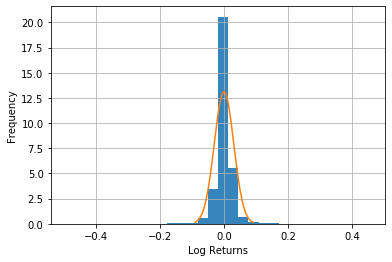

Value at Risk for 1 day at 90% Confidence Interval is -0.03923
Value at Risk for 1 day at 95% Confidence Interval is -0.05027
Value at Risk for 1 day at 99% Confidence Interval is -0.07098


In [129]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import statsmodels.api as sm
import seaborn as sns
import pandas_datareader.data as web
import numpy.random as npr
import scipy.stats as scs
from datetime import datetime
from pandas.plotting import lag_plot
%matplotlib inline

start_date = datetime(2000, 1, 1)
end_date = datetime(2019,11,9)

citi = web.DataReader('C', 'yahoo', start_date, end_date)
citi_sp = citi["Adj Close"]
#citi_sp.tail()
citi["retns"] = citi["Adj Close"].pct_change()
#print("Citi returns ", citi["retns"].tail())

citi["log_retns"] = np.log(citi["Adj Close"]/citi["Adj Close"].shift(1))
#print("Citi Log returns ", citi["log_retns"].tail())

mean = np.mean(citi["log_retns"])
vol = np.std(citi["log_retns"])
print("Mean of citi stock log returns is", round(mean, 5))
print("Volatility of citi stock log returns is", round(vol, 3))

##Plot Returns
citi["log_retns"].hist(bins = 30, density = True, alpha = 0.9)
plt.xlabel("Log Returns")
plt.ylabel("Frequency")
x = np.linspace(mean - 3*vol, mean + 3*vol, 100)
plt.plot(x, scs.norm.pdf(x, mean, vol))
plt.show()

var_90 = scs.norm.ppf(1 - 0.90, mean, vol)
var_95 = scs.norm.ppf(1 - 0.95, mean, vol)
var_99 = scs.norm.ppf(1 - 0.99, mean, vol)
print("Value at Risk for 1 day at 90% Confidence Interval is", round(var_90, 5))
print("Value at Risk for 1 day at 95% Confidence Interval is", round(var_95, 5))
print("Value at Risk for 1 day at 99% Confidence Interval is", round(var_99, 5))

In [124]:
def var_DollarAmt(port, ci, mean, vol, t):
    """  Variance-Covariance calculation of Value-at-Risk using confidence level ci,
    with mean and standard deviation of log returns, on a portfolio for time t in days."""
    
    alpha = scs.norm.ppf(1-ci, mean, vol) * np.sqrt(t)
    port_loss = port - port*(alpha + 1)
      
    return port_loss

In [125]:
portfolio = 1000000   # 1,000,000 USD
ci = 0.95  # 99% confidence interval
t = 10
var = var_DollarAmt(portfolio, ci, mean, vol, t)
print("The value at risk for", t, "days at", ci, "Confidence interval for Citigroup portfolio worth", portfolio, "is", round(var, 3))

The value at risk for 10 days at 0.95 Confidence interval for Citigroup portfolio worth 1000000 is 158975.995


In [130]:
##Lets now calculate VAR for a portfolio of stocks

jpm = web.DataReader('JPM', 'yahoo', start_date, end_date)
jpm["log_retns"] = np.log(jpm["Adj Close"]/jpm["Adj Close"].shift(1))

msft = web.DataReader('MSFT', 'yahoo', start_date, end_date)
msft["log_retns"] = np.log(msft["Adj Close"]/msft["Adj Close"].shift(1))

proctorg = web.DataReader('PG', 'yahoo', start_date, end_date)
proctorg["log_retns"] = np.log(proctorg["Adj Close"]/proctorg["Adj Close"].shift(1))

port_assets = pd.DataFrame({'CITI': citi["log_retns"], 'JPM': jpm["log_retns"], 'MSFT': msft["log_retns"], 'PG': proctorg["log_retns"]})
port_assets.tail()

,CITI,JPM,MSFT,PG
Date,,,,
2019-11-04,0.017586,0.007950,0.005759,-0.039521
2019-11-05,-0.004267,0.002171,-0.000623,-0.001429
2019-11-06,-0.005494,0.001548,-0.002773,0.011872
2019-11-07,0.018505,0.005399,0.001387,-0.005835
2019-11-08,0.004081,0.002919,0.011715,0.000669


In [131]:
#dfna = df.dropna()
rnum = np.random.rand(4) # generating 4 random numbers
weight = np.asmatrix(rnum/sum(rnum)) # assigning weights to each portfolio based on the randomly generated numbers summing to 100%
pa = np.asmatrix(np.mean(port_assets))
cov_pa = port_assets.cov()

mean_pa = weight * pa.T
vol_pa = np.sqrt(weight * np.asmatrix(cov_pa) * weight.T)
# These are the mean and standard deviation of the portfolio returns. 
# Now we can just use the normal distribution to help us, 
# making the assumption that percent change is distributed normally.

var_pa = var_DollarAmt(portfolio, ci, mean_pa, vol_pa, t)

print("The value at risk for", t, "days at", ci, "Confidence interval for portfolio of assets worth", portfolio, "is", var_pa)

The value at risk for 10 days at 0.95 Confidence interval for portfolio of assets worth 1000000 is [[94231.49921674]]
